In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import re
import scipy as sp
import scipy.stats as stats
from scipy.interpolate import interp1d

import stats13tools.stats13tools as st

%matplotlib inline

In [2]:
colors = {"orange": "#f0ad4e",
          "red": "#d9534f",
          "blue": "#5bc0de",
          "green": "#5cb85c",
          "gray": "#636c72",
          "lightgray": "#d2d2d2"
         }

# Home for sale

In [98]:
#pd.read_csv("data-src/04cars.dat.txt")

In [152]:
#DATASET CARS 2004    
with open("data-src/04cars.dat.txt",'r') as f:
    lines = [l.rstrip().split() for l in f]
    data_clean = []
    
    # extract name of car
    for line in lines:
        s1 = np.where((np.array(line)=="0")==True)[0]
        s2 = np.where((np.array(line)=="1")==True)[0]
        if (np.sum(s1)>0) & (np.sum(s2)>0):
            n = np.min([s1[0], s2[0]])
        elif (np.sum(s1)>0) & (np.sum(s2)==0):
            n = s1[0]
        elif (np.sum(s1)==0) & (np.sum(s2)>0):
            n = s2[0]
        else:
            print("no match")
        name = [" ".join(line[:n])] #concatenate name of car
        for element in line[n:]: #add all the params
            name.append(element)
        
        data_clean.append(name)
        
    
        data = pd.DataFrame(data_clean, 
                       columns=["Model", "SportCar", "SportUtility", "Wagon", "Minivan", "Pickup",
                              "AllWheelDrive", "RearWheelDrive", "RetailPrice", "DealerCost", "EngineSize", "Cylinders", "Horsepower",
                              "CityMPG", "HwyMPG", "Weight", "WheelBase", "Length", "Width"])

#data.head()

data= data.replace("*", np.nan)

In [154]:
#DATASET CARS 1993
with open("data-src/93cars.dat.txt",'r') as f:
    lines = [l.rstrip().split() for l in f]
    data = pd.DataFrame([lines[i-1]+lines[i] for i in range(1, len(lines), 2)], 
                       columns=["Manufacturer", "Model", "Type", "MinPrice", "MidPrice", "MaxPrice",
                              "CityMPG", "HwyMPG", "Airbag", "Drive", "Cylinders", "EngineSize", "Horsepower",
                              "RPM", "EngineRevolution", "ManualT", "FuelTankCap", "PassengerCap", "Length",
                              "Wheelbase", "Width", "UTurnSpace", "RearSeatRoom", "LuggageCap", "Weight",
                              "Domestic"])
    data = data.replace("*", np.nan)

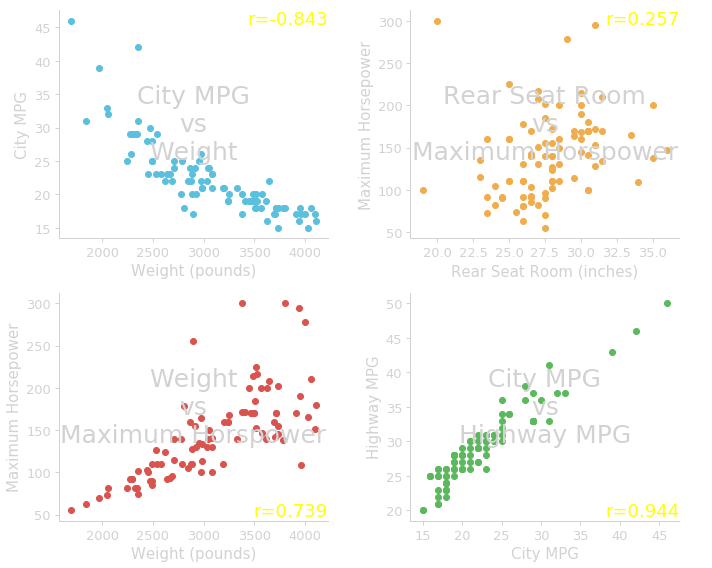

In [258]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(10,8))

ax5 = ax1.twinx()
ax6 = ax2.twinx()
ax7 = ax3.twinx()
ax8 = ax4.twinx()

ax9 = ax1.twinx()
ax10 = ax2.twinx()
ax11 = ax3.twinx()
ax12 = ax4.twinx()

for ax in [ax1]:
    ax.plot(data.Weight, data.CityMPG, "o", color=colors["blue"])
    ax.set_xlabel("Weight (pounds)", color=colors["lightgray"], size=15)
    ax.set_ylabel("City MPG", color=colors["lightgray"], size=15)
for ax in [ax5]:
    ax.axis("off")
    ax.set_ylim(ax1.get_ylim())
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.5, ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.5,
           "City MPG\nvs\nWeight", ha="center", va="center", size=25, color=colors["lightgray"])
for ax in [ax9]:
    ax.axis("off")
    ax.set_ylim(ax1.get_ylim())
    ax.text(ax.get_xlim()[1], ax.get_ylim()[1], "r={:.3f}".format(np.corrcoef(data.Weight.astype(float), data.CityMPG.astype(float))[1,0]),
            ha="right", va="top", color="yellow", size=18)

for ax in [ax2]:
    ax.plot(data.RearSeatRoom, data.Horsepower, "o", color=colors["orange"])
    ax.set_xlabel("Rear Seat Room (inches)", color=colors["lightgray"], size=15)
    ax.set_ylabel("Maximum Horsepower", color=colors["lightgray"], size=15)
for ax in [ax6]:
    ax.axis("off")
    ax.set_ylim(ax2.get_ylim())
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.5, ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.5,
           "Rear Seat Room\nvs\nMaximum Horspower", ha="center", va="center", size=25, color=colors["lightgray"])
for ax in [ax10]:
    ax.axis("off")
    ax.set_ylim(ax2.get_ylim())
    ax.text(ax.get_xlim()[1], ax.get_ylim()[1], "r={:.3f}".format(np.corrcoef(data.RearSeatRoom.dropna().astype(float), data.Horsepower.ix[data.RearSeatRoom.dropna().index].astype(float))[1,0]),
            ha="right", va="top", color="yellow", size=18)
    
for ax in [ax3]:
    ax.plot(data.Weight, data.Horsepower, "o", color=colors["red"])
    ax.set_xlabel("Weight (pounds)", color=colors["lightgray"], size=15)
    ax.set_ylabel("Maximum Horsepower", color=colors["lightgray"], size=15)
for ax in [ax7]:
    ax.axis("off")
    ax.set_ylim(ax3.get_ylim())
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.5, ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.5,
           "Weight\nvs\nMaximum Horspower", ha="center", va="center", size=25, color=colors["lightgray"])
for ax in [ax11]:
    ax.axis("off")
    ax.set_ylim(ax3.get_ylim())
    ax.text(ax.get_xlim()[1], ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.08, "r={:.3f}".format(np.corrcoef(data.Weight.astype(float), data.Horsepower.astype(float))[1,0]),
            ha="right", va="top", color="yellow", size=18)

for ax in [ax4]:
    ax.plot(data.CityMPG, data.HwyMPG, "o", color=colors["green"])
    ax.set_xlabel("City MPG", color=colors["lightgray"], size=15)
    ax.set_ylabel("Highway MPG", color=colors["lightgray"], size=15)
for ax in [ax8]:
    ax.axis("off")
    ax.set_ylim(ax4.get_ylim())
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.5, ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.5,
           "City MPG\nvs\nHighway MPG", ha="center", va="center", size=25, color=colors["lightgray"])
for ax in [ax12]:
    ax.axis("off")
    ax.set_ylim(ax4.get_ylim())
    ax.text(ax.get_xlim()[1], ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.08, "r={:.3f}".format(np.corrcoef(data.CityMPG.astype(float), data.HwyMPG.astype(float))[1,0]),
            ha="right", va="top", color="yellow", size=18)

for ax in [ax1, ax2, ax3, ax4]:
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="y", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.tick_params(axis="x", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    
plt.tight_layout()

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/correlation-car.svg", transparent=True)

# Simulation null hypothesis

In [58]:
n_simul = 10000
res_diff_mean = np.zeros(n_simul) #store the data
res_diff_median = np.zeros(n_simul) #store the data

n_bike_carbon = len(data[data.Frame=="carbon"])
n_bike_steel = len(data[data.Frame=="steel"])

all_times = data.Time.values.copy()

#each simulation is the shuffling of the full population and the
#calculation of the difference in proportion of shifts with death
for i in range(n_simul):
    np.random.shuffle(all_times)
    carbon_times = all_times[:n_bike_carbon]
    steel_times = all_times[n_bike_carbon:]
    res_diff_mean[i] = np.mean(carbon_times)-np.mean(steel_times)
    res_diff_median[i] = np.median(carbon_times)-np.median(steel_times)

### Simulation steps

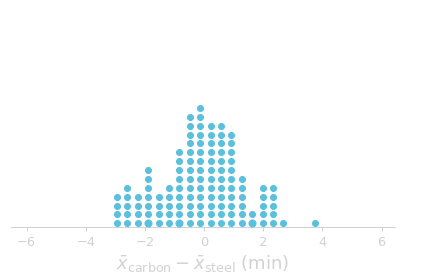

In [59]:
x1, y1 = st.to_dotplot(res_diff_mean[:120], kind="bins", scale=0.05, nbins=20)

#randomize order of each rows of data points
rows_yval = np.unique(y1)
idx_by_rows = [list(np.where(y1 == val)[0]) for val in rows_yval]
for i in range(len(idx_by_rows)):
    np.random.shuffle(idx_by_rows[i])
shuffled_idx = np.concatenate(idx_by_rows)

x1 = x1[shuffled_idx]
y1 = y1[shuffled_idx]

fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()
ax5 = ax1.twinx()
ax6 = ax1.twinx()
ax7 = ax1.twinx()
ax8 = ax1.twinx()

for ax in [ax1]:
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel(r'$\bar{x}_{\mathrm{carbon}}-\bar{x}_{\mathrm{steel}}$ (min)', size=18, color=colors["lightgray"])
    ax.set_ylim(-0.02, 1.2)
    ax.set_xlim(res_diff_mean.min()-1, res_diff_mean.max()+1)
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,5))

for ax in [ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    ax.set_ylim(ax1.get_ylim())
    ax.axis("off")
    
for ax in [ax2]:
    ax.scatter(x1[0], y1[0], s=50, color=colors["blue"])

for ax in [ax3]:
    ax.scatter(x1[1], y1[1], s=50, color=colors["blue"])

for ax in [ax4]:
    ax.scatter(x1[2], y1[2], s=50, color=colors["blue"])

for ax in [ax5]:
    ax.scatter(x1[3:25], y1[3:25], color=colors["blue"])

for ax in [ax6]:
    ax.scatter(x1[25:50], y1[25:50], color=colors["blue"])

for ax in [ax7]:
    ax.scatter(x1[50:80], y1[50:80], color=colors["blue"])

for ax in [ax8]:
    ax.scatter(x1[80:], y1[80:], color=colors["blue"])

plt.tight_layout()

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/bike-commute-simulation-diff-mean.svg", transparent=True)

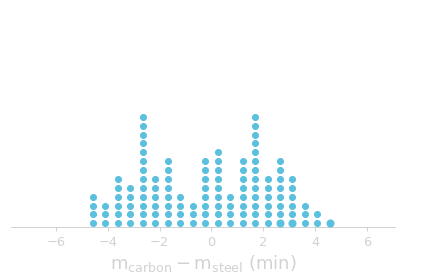

In [60]:
x1, y1 = st.to_dotplot(res_diff_median[:120], kind="bins", scale=0.05, nbins=20)

#randomize order of each rows of data points
rows_yval = np.unique(y1)
idx_by_rows = [list(np.where(y1 == val)[0]) for val in rows_yval]
for i in range(len(idx_by_rows)):
    np.random.shuffle(idx_by_rows[i])
shuffled_idx = np.concatenate(idx_by_rows)

x1 = x1[shuffled_idx]
y1 = y1[shuffled_idx]

fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()
ax5 = ax1.twinx()
ax6 = ax1.twinx()
ax7 = ax1.twinx()
ax8 = ax1.twinx()

for ax in [ax1]:
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel('$\mathrm{m}_{\mathrm{carbon}}-\mathrm{m}_{\mathrm{steel}}$ (min)', size=18, color=colors["lightgray"])
    ax.set_ylim(-0.02, 1.2)
    ax.set_xlim(res_diff_median.min()-1, res_diff_median.max()+1)
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,5))

for ax in [ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    ax.set_ylim(ax1.get_ylim())
    ax.axis("off")
    
for ax in [ax2]:
    ax.scatter(x1[0], y1[0], s=50, color=colors["blue"])

for ax in [ax3]:
    ax.scatter(x1[1], y1[1], s=50, color=colors["blue"])

for ax in [ax4]:
    ax.scatter(x1[2], y1[2], s=50, color=colors["blue"])

for ax in [ax5]:
    ax.scatter(x1[3:25], y1[3:25], color=colors["blue"])

for ax in [ax6]:
    ax.scatter(x1[25:50], y1[25:50], color=colors["blue"])

for ax in [ax7]:
    ax.scatter(x1[50:80], y1[50:80], color=colors["blue"])

for ax in [ax8]:
    ax.scatter(x1[80:], y1[80:], color=colors["blue"])

plt.tight_layout()

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/bike-commute-simulation-diff-median.svg", transparent=True)

### Full simulation (10000)

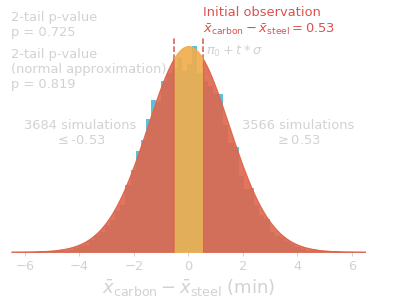

In [136]:
#Observed diff
bike_diff_mean = data[data.Frame=="carbon"].Time.mean()-data[data.Frame=="steel"].Time.mean()
bike_diff_mean_se = np.sqrt((data[data.Frame=="carbon"].Time.std()**2/n_bike_carbon)+(data[data.Frame=="steel"].Time.std()**2/n_bike_steel))

#t distribution
tdist_bike_diff = stats.t(df=len(data)-2, loc=0, scale=bike_diff_mean_se)
xt_bike_diff = np.linspace(-6.5, 6.5, 1000)
yt_bike_diff = tdist_bike_diff.pdf(xt_bike_diff)

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.1, 0.15, 0.82, 0.75])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()
ax5 = ax1.twinx()
    
for ax in [ax1]:
    ax.hist(res_diff_mean, bins="auto", color=colors["blue"])
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel(r'$\bar{x}_{\mathrm{carbon}}-\bar{x}_{\mathrm{steel}}$ (min)', size=18, color=colors["lightgray"])
    ax.set_xlim(xt_bike_diff.min(), xt_bike_diff.max())
    ax.set_ylim(0)
    
for ax in [ax2]:
    ax.set_ylim(ax1.get_ylim())
    ax.axvline(bike_diff_mean, color=colors["red"], ls="--")
    ax.text(bike_diff_mean, ax.get_ylim()[1]*1.01, "Initial observation\n" r"$\bar{{x}}_{{\mathrm{{carbon}}}}-\bar{{x}}_{{\mathrm{{steel}}}}={:.2f}$".format(bike_diff_mean), color=colors["red"], size=13, ha="left")
    ax.axis("off")
    
for ax in [ax3]:
    ax.set_ylim(ax1.get_ylim())
    ax.axvline(0-bike_diff_mean, color=colors["red"], ls="--")
    ax.text(bike_diff_mean+3.5, ax.get_ylim()[1]*0.5, "{:.0f} simulations\n$\geq${:.2f}".format(np.sum(res_diff_mean>=bike_diff_mean), bike_diff_mean), color=colors["lightgray"], size=13, ha="center")
    ax.text(bike_diff_mean-4.5, ax.get_ylim()[1]*0.5, "{:.0f} simulations\n$\leq${:.2f}".format(np.sum(res_diff_mean<=0-bike_diff_mean), 0-bike_diff_mean), color=colors["lightgray"], size=13, ha="center")
    n_extreme = np.sum(res_diff_mean<=0-bike_diff_mean)+np.sum(res_diff_mean>=bike_diff_mean)
    ax.text(ax.get_xlim()[0], ax.get_ylim()[1]*1, "2-tail p-value\np = {:.3f}".format(n_extreme/10000), color=colors["lightgray"], size=13, ha="left")
    ax.axis("off")

for ax in [ax4]:
    lower_lim = 0-bike_diff_mean
    upper_lim = bike_diff_mean
    ax.fill_between(xt_bike_diff, yt_bike_diff,
                       color=colors["orange"], alpha=0.7)
    ax.set_ylim(0)
    ax.axis("off")

for ax in [ax5]:
    lower_lim = 0-bike_diff_mean
    upper_lim = bike_diff_mean
    ax.fill_between(xt_bike_diff[(xt_bike_diff>lower_lim) & (xt_bike_diff<upper_lim)], yt_bike_diff[(xt_bike_diff>lower_lim) & (xt_bike_diff<upper_lim)],
                       color=colors["orange"], alpha=0.7)
    ax.fill_between(xt_bike_diff[(xt_bike_diff<=lower_lim)], yt_bike_diff[(xt_bike_diff<=lower_lim)],
                       color=colors["red"], alpha=0.7)
    ax.fill_between(xt_bike_diff[(xt_bike_diff>=upper_lim)], yt_bike_diff[(xt_bike_diff>=upper_lim)],
                       color=colors["red"], alpha=0.7)
    ax.set_ylim(0)
    norm_pvalue_2tail = tdist_bike_diff.sf(0.53/bike_diff_mean_se)*2
    ax.text(ax.get_xlim()[0], ax.get_ylim()[1]*0.76, "2-tail p-value\n(normal approximation)\np = {:.3f}".format(norm_pvalue_2tail), color=colors["lightgray"], size=13, ha="left")
    ax.text(0.65, ax.get_ylim()[1]*0.91, "$\pi_0+t*\sigma$", color=colors["lightgray"], size=13, ha="left")
    ax.axis("off")


plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/bike-commute-simulation-diff-mean-all.svg", transparent=True)

In [100]:
t_stat = (108.34-107.81)/np.sqrt(6.25**2/26+4.89**2/30)
t_stat

0.34951163077089586

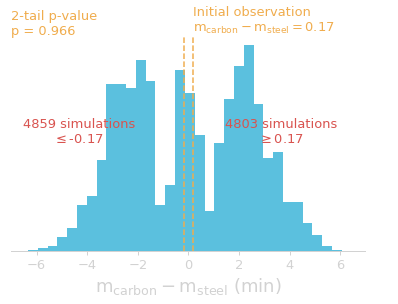

In [125]:
#Observed diff
bike_diff_median = data[data.Frame=="carbon"].Time.median()-data[data.Frame=="steel"].Time.median()

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.1, 0.15, 0.82, 0.75])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
    
for ax in [ax1]:
    ax.hist(res_diff_median, bins="auto", color=colors["blue"])
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel('$\mathrm{m}_{\mathrm{carbon}}-\mathrm{m}_{\mathrm{steel}}$ (min)', size=18, color=colors["lightgray"])
    ax.set_xlim(-7, 7)
    ax.set_ylim(0)
    
for ax in [ax2]:
    ax.set_ylim(ax1.get_ylim())
    ax.axvline(bike_diff_median, color=colors["orange"], ls="--")
    ax.text(bike_diff_median, ax.get_ylim()[1]*1.01, "Initial observation\n" "$\mathrm{{m}}_{{\mathrm{{carbon}}}}-\mathrm{{m}}_{{\mathrm{{steel}}}}={:.2f}$".format(bike_diff_median), color=colors["orange"], size=13, ha="left")
    ax.axis("off")
    
for ax in [ax3]:
    ax.set_ylim(ax1.get_ylim())
    ax.axvline(0-bike_diff_median, color=colors["orange"], ls="--")
    ax.text(bike_diff_median+3.5, ax.get_ylim()[1]*0.5, "{:.0f} simulations\n$\geq${:.2f}".format(np.sum(res_diff_median>=bike_diff_median), bike_diff_median), color=colors["red"], size=13, ha="center")
    ax.text(bike_diff_median-4.5, ax.get_ylim()[1]*0.5, "{:.0f} simulations\n$\leq${:.2f}".format(np.sum(res_diff_median<=0-bike_diff_median), 0-bike_diff_median), color=colors["red"], size=13, ha="center")
    n_extreme = np.sum(res_diff_median<=0-bike_diff_median)+np.sum(res_diff_median>=bike_diff_median)
    ax.text(ax.get_xlim()[0], ax.get_ylim()[1]*1, "2-tail p-value\np = {:.3f}".format(n_extreme/10000), color=colors["orange"], size=13, ha="left")
    ax.axis("off")


plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/bike-commute-simulation-diff-median-all.svg", transparent=True)

## Simulation 95% confidence intervals

In [6]:
n_simul = 10000
res_median = np.zeros(n_simul) #store the data

n_bike_carbon = len(data[data.Frame=="carbon"])
n_bike_steel = len(data[data.Frame=="steel"])

#each simulation is the difference in median time from isolated bootstrap samples
for i in range(n_simul):
    bootstrap_carbon = np.random.choice(data[data.Frame=="carbon"].Time, size=n_bike_carbon)
    bootstrap_steel = np.random.choice(data[data.Frame=="steel"].Time, size=n_bike_steel)
    res_median[i] = np.median(bootstrap_carbon)-np.median(bootstrap_steel)

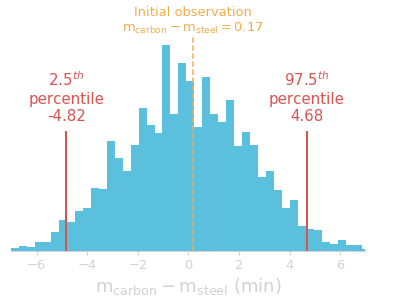

In [13]:
#Observed diff
bike_diff_median = data[data.Frame=="carbon"].Time.median()-data[data.Frame=="steel"].Time.median()

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.1, 0.15, 0.82, 0.75])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
    
for ax in [ax1]:
    ax.hist(res_median, bins="auto", color=colors["blue"])
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel('$\mathrm{m}_{\mathrm{carbon}}-\mathrm{m}_{\mathrm{steel}}$ (min)', size=18, color=colors["lightgray"])
    ax.set_xlim(-7, 7)
    ax.set_ylim(0)
    
for ax in [ax2]:
    ax.set_ylim(ax1.get_ylim())
    ax.axvline(bike_diff_median, color=colors["orange"], ls="--")
    ax.text(bike_diff_median, ax.get_ylim()[1]*1.01, "Initial observation\n" "$\mathrm{{m}}_{{\mathrm{{carbon}}}}-\mathrm{{m}}_{{\mathrm{{steel}}}}={:.2f}$".format(bike_diff_median), color=colors["orange"], size=13, ha="center")
    ax.axis("off")

for ax in [ax3]:
    ax.axvline(np.percentile(res_median, 2.5), ymax=0.55, color=colors["red"], lw=2)
    ax.axvline(np.percentile(res_median, 97.5), ymax=0.55, color=colors["red"], lw=2)
    ax.text(np.percentile(res_median, 2.5), ax.get_ylim()[1]*0.6, "2.5$^{{th}}$\npercentile\n{:.2f}".format(np.percentile(res_median, 2.5)), color=colors["red"], size=15, ha="center")
    ax.text(np.percentile(res_median, 97.5), ax.get_ylim()[1]*0.6, "97.5$^{{th}}$\npercentile\n{:.2f}".format(np.percentile(res_median, 97.5)), color=colors["red"], size=15, ha="center")
    ax.axis("off")


plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/bike-commute-simulation-diff-median-resampling-ci95.svg", transparent=True)

# t test

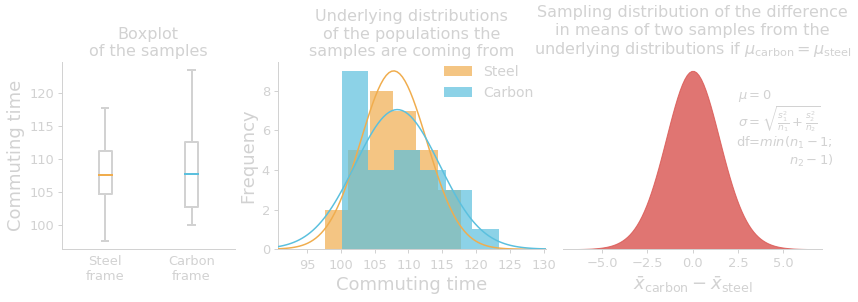

In [140]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_axes([0.065, 0.155, 0.2, 0.65])
ax2 = fig.add_axes([0.315, 0.155, 0.31, 0.65])
ax3 = ax2.twinx()
ax4 = fig.add_axes([0.645, 0.155, 0.3, 0.65])

for ax in [ax1]:
    bp = ax.boxplot([data[data.Frame=="steel"].Time, data[data.Frame=="carbon"].Time], labels=["Steel\nframe", "Carbon\nframe"],
              boxprops = dict(linewidth=2, color=colors["lightgray"]),
              flierprops = dict(marker='o', markeredgecolor=colors["lightgray"], linestyle='none'),
              whiskerprops = dict(color=colors["lightgray"], linewidth=2),
              capprops = dict(color=colors["lightgray"], linewidth=2),
              medianprops = dict(color=colors["orange"], linewidth=2))
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.set_ylabel("Commuting time", size=18, color=colors["lightgray"], ha="center")
    ax.tick_params(axis="y", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.tick_params(axis="x", width=1, size=0, labelcolor=colors["lightgray"], 
                   labelsize=13, pad=6)
    ## change color of the medians
    for color,median in zip([colors["orange"], colors["blue"]], bp['medians']):
        median.set(color=color, linewidth=2)
    ax.set_title("Boxplot\nof the samples", color=colors["lightgray"], size=16, ha="center")
        

for ax in [ax2]:
    ax.hist(data[data.Frame=="steel"].Time, bins="auto", color=colors["orange"], alpha=0.7, label="Steel")
    ax.hist(data[data.Frame=="carbon"].Time, bins="auto", color=colors["blue"], alpha=0.7, label="Carbon")
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.set_ylabel("Frequency", size=18, color=colors["lightgray"], ha="center")
    ax.tick_params(axis="y", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.tick_params(axis="x", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=6)
    ax.set_xlabel("Commuting time", size=18, color=colors["lightgray"], ha="center")
    #ax.set_ylim(0)
    ax.set_xlim(data.Time.min()-7, data.Time.max()+7)
    legend = ax.legend(prop=dict(size=14), loc="upper right", frameon=False, facecolor="none",
                      bbox_to_anchor=(1, 1.05))
    for text in legend.get_texts():
        text.set_color(colors["lightgray"])
    ax.set_title("Underlying distributions\nof the populations the\nsamples are coming from", color=colors["lightgray"], size=16, ha="center")
    
for ax in [ax3]:
    ##norm distributions
    x_norm = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)
    norm_steel = stats.norm(loc=data[data.Frame=="steel"].Time.mean(), scale=data[data.Frame=="steel"].Time.std())
    norm_carbon = stats.norm(loc=data[data.Frame=="carbon"].Time.mean(), scale=data[data.Frame=="carbon"].Time.std())
    y_norm_steel = norm_steel.pdf(x_norm)
    y_norm_carbon = norm_carbon.pdf(x_norm)
    ax.plot(x_norm, y_norm_steel, color=colors["orange"])
    ax.plot(x_norm, y_norm_carbon, color=colors["blue"])
    ax.set_ylim(0)
    ax.axis("off")
    
for ax in [ax4]:
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis="x", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ##t distributions
    bike_diff_mean_se = np.sqrt((data[data.Frame=="carbon"].Time.std()**2/len(data[data.Frame=="carbon"]))+(data[data.Frame=="steel"].Time.std()**2/len(data[data.Frame=="steel"])))
    x_t_diff = np.linspace(-6.5, 6.5, 100)
    t_diff = stats.t(df=np.min([len(data[data.Frame=="carbon"])-1, len(data[data.Frame=="steel"])-1]), loc=0, scale=bike_diff_mean_se)
    y_t_diff = t_diff.pdf(x_t_diff)
    ax.fill_between(x_t_diff, y_t_diff, color=colors["red"], alpha=0.8)
    ax.set_ylim(0)
    ax.set_xlabel(r"$\bar{x}_{\mathrm{carbon}}-\bar{x}_{\mathrm{steel}}$", size=18, color=colors["lightgray"], ha="center")
    ax.set_title("Sampling distribution of the difference\nin means of two samples from the\nunderlying distributions if $\mu_\mathrm{carbon}=\mu_\mathrm{steel}$", color=colors["lightgray"], size=16, ha="center")
    ax.text(2.5, ax.get_ylim()[1]*0.8, r"$\mu=0$", color=colors["lightgray"], size=13, ha="left")
    ax.text(2.5, ax.get_ylim()[1]*0.65, r"$\sigma=\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}$", color=colors["lightgray"], size=13, ha="left")
    ax.text(7.75, ax.get_ylim()[1]*0.45, "df=$min(n_1-1;$" "\n" "$n_2-1)$", color=colors["lightgray"], size=13, ha="right")


    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/bike-commute-ttest-model.svg", transparent=True)

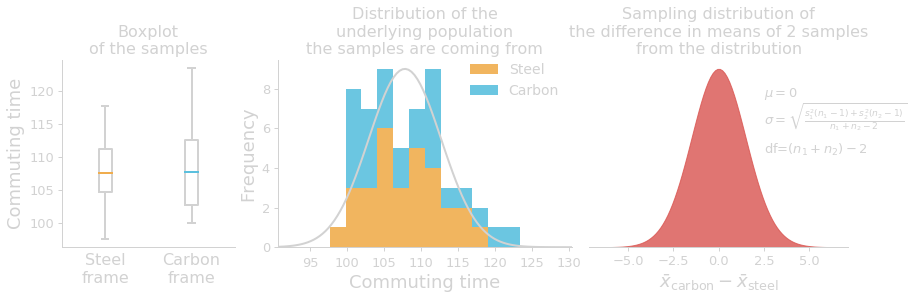

In [139]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_axes([0.065, 0.155, 0.2, 0.65])
ax2 = fig.add_axes([0.315, 0.155, 0.34, 0.65])
ax3 = ax2.twinx()
ax4 = fig.add_axes([0.675, 0.155, 0.3, 0.65])
    
for ax in [ax1]:
    bp = ax.boxplot([data[data.Frame=="steel"].Time, data[data.Frame=="carbon"].Time], labels=["Steel\nframe", "Carbon\nframe"],
              boxprops = dict(linewidth=2, color=colors["lightgray"]),
              flierprops = dict(marker='o', markeredgecolor=colors["lightgray"], linestyle='none'),
              whiskerprops = dict(color=colors["lightgray"], linewidth=2),
              capprops = dict(color=colors["lightgray"], linewidth=2),
              medianprops = dict(color=colors["orange"], linewidth=2))
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.set_ylabel("Commuting time", size=18, color=colors["lightgray"], ha="center")
    ax.tick_params(axis="y", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.tick_params(axis="x", width=1, size=0, labelcolor=colors["lightgray"], 
                   labelsize=16, pad=6)
    ## change color of the medians
    for color,median in zip([colors["orange"], colors["blue"]], bp['medians']):
        median.set(color=color, linewidth=2)
    ax.set_title("Boxplot\nof the samples", color=colors["lightgray"], size=16, ha="center")
        

for ax in [ax2]:
    ax.hist([data[data.Frame=="steel"].Time, data[data.Frame=="carbon"].Time], bins=12, stacked=True, color=[colors["orange"], colors["blue"]], alpha=0.9, label=["Steel", "Carbon"])
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.set_ylabel("Frequency", size=18, color=colors["lightgray"], ha="center")
    ax.tick_params(axis="y", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.tick_params(axis="x", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=6)
    ax.set_xlabel("Commuting time", size=18, color=colors["lightgray"], ha="center")
    #ax.set_ylim(0)
    ax.set_xlim(data.Time.min()-7, data.Time.max()+7)
    legend = ax.legend(prop=dict(size=14), loc="upper right", frameon=False, facecolor="none",
                      bbox_to_anchor=(1, 1.05))
    for text in legend.get_texts():
        text.set_color(colors["lightgray"])
    ax.set_title("Distribution of the\nunderlying population\nthe samples are coming from", color=colors["lightgray"], size=16, ha="center")
    
for ax in [ax3]:
    ##norm distributions
    x_norm = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)
    norm_merged = stats.norm(loc=(data[data.Frame=="steel"].Time.mean()+data[data.Frame=="carbon"].Time.mean())/2, scale=data.Time.std())
    y_norm_merged = norm_steel.pdf(x_norm)
    ax.plot(x_norm, y_norm_merged, color=colors["lightgray"], lw=2)
    ax.set_ylim(0)
    ax.axis("off")
    
for ax in [ax4]:
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis="x", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ##t distributions
    bike_diff_mean_se = np.sqrt((data[data.Frame=="carbon"].Time.std()**2/len(data[data.Frame=="carbon"]))+(data[data.Frame=="steel"].Time.std()**2/len(data[data.Frame=="steel"])))
    x_t_diff = np.linspace(-6.5, 6.5, 100)
    t_diff = stats.t(df=len(data)-2, loc=0, scale=bike_diff_mean_se)
    y_t_diff = t_diff.pdf(x_t_diff)
    ax.fill_between(x_t_diff, y_t_diff, color=colors["red"], alpha=0.8)
    ax.set_ylim(0)
    ax.set_xlabel(r"$\bar{x}_{\mathrm{carbon}}-\bar{x}_{\mathrm{steel}}$", size=18, color=colors["lightgray"], ha="center")
    ax.set_title("Sampling distribution of\nthe difference in means of 2 samples\nfrom the distribution", color=colors["lightgray"], size=16, ha="center")
    ax.text(2.5, ax.get_ylim()[1]*0.8, r"$\mu=0$", color=colors["lightgray"], size=13, ha="left")
    ax.text(2.5, ax.get_ylim()[1]*0.65, r"$\sigma=\sqrt{\frac{s_1^2(n_1-1)+s_2^2(n_2-1)}{n_1+n_2-2}}$", color=colors["lightgray"], size=13, ha="left")
    ax.text(2.5, ax.get_ylim()[1]*0.5, "df=$(n_1+n_2)-2$", color=colors["lightgray"], size=13, ha="left")
    
#plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/bike-commute-pooled-ttest-model.svg", transparent=True)

In [103]:
t_diff.sf(t_stat)*2

0.81856900116991382

In [6]:
np.sqrt((6.25**2/26)+(4.89**2/30))



1.5164016111023642

# Paired data

In [3]:
data = pd.read_csv("data-Lock5DataCSV/Wetsuits.csv")
data

,Wetsuit,NoWetsuit,Gender,Type
0,1.57,1.49,F,swimmer
1,1.47,1.37,F,triathlete
2,1.42,1.35,F,swimmer
3,1.35,1.27,F,triathlete
4,1.22,1.12,M,triathlete
5,1.75,1.64,M,swimmer
6,1.64,1.59,M,swimmer
7,1.57,1.52,M,triathlete
8,1.56,1.50,M,triathlete
9,1.53,1.45,M,triathlete


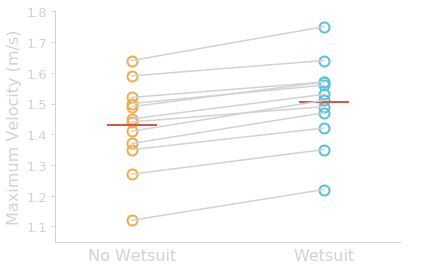

In [56]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.15, 0.15, 0.8, 0.8])
ax2 = ax1.twinx()
ax3 = ax1.twinx()

for ax in [ax1]:
    ax.plot(np.zeros(len(data)), data.NoWetsuit, "o", ms=10, mfc="none", mec=colors["orange"], mew=2)
    ax.plot(np.zeros(len(data))+1, data.Wetsuit, "o", ms=10, mfc="none", mec=colors["blue"], mew=2)
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="y", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.tick_params(axis="x", width=1, size=0, labelcolor=colors["lightgray"], 
                   labelsize=16, pad=6)
    ax.set_ylabel("Maximum Velocity (m/s)", size=16, color=colors["lightgray"], ha="center")
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["No Wetsuit", "Wetsuit"])
    ax.set_xlim(-0.4, 1.4)
    ax.set_ylim(1.05, 1.8)

for ax in [ax2]:
    for i,m in zip([0, 1], data[["NoWetsuit", "Wetsuit"]].mean()):
        ax.plot(i, m, "_", ms=50, color=colors["red"], mew=2)
    ax.set_ylim(ax1.get_ylim())
    ax.axis("off")

for ax in [ax3]:
    ax.axis("off")
    for row in range(len(data)):
        ax.plot([0, 1], data.ix[row][["NoWetsuit", "Wetsuit"]], "-", color=colors["lightgray"])
    ax.set_ylim(ax1.get_ylim())
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/wetsuit-data.svg", transparent=True)

# NHST - not paired

In [4]:
n_simul = 10000

res_diff = np.zeros(n_simul)

population = data[["NoWetsuit", "Wetsuit"]].values.flatten()

for i in range(n_simul):
    np.random.shuffle(population)
    sample1 = population[:len(data.Wetsuit)]
    sample2 = population[len(data.Wetsuit):]
    res_diff[i] = np.mean(sample2)-np.mean(sample1)


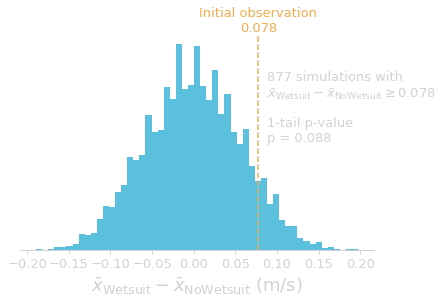

In [5]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.01, 0.15, 0.82, 0.75])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
    
for ax in [ax1]:
    ax.hist(res_diff, bins="auto", color=colors["blue"])
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel(r'$\bar{x}_{\mathrm{Wetsuit}}-\bar{x}_{\mathrm{No Wetsuit}}$ (m/s)', size=18, color=colors["lightgray"])
    ax.set_ylim(0)

for ax in [ax2]:
    ax.set_ylim(ax1.get_ylim())
    ax.axvline(np.diff(data[["NoWetsuit", "Wetsuit"]].mean()), color=colors["orange"], ls="--")
    ax.text(np.diff(data[["NoWetsuit", "Wetsuit"]].mean()), ax.get_ylim()[1]*1.01, "Initial observation\n" "{:.3f}".format(np.diff(data[["NoWetsuit", "Wetsuit"]].mean())[0]), color=colors["orange"], size=13, ha="center")
    ax.axis("off")
    
for ax in [ax3]:
    ax.set_ylim(ax1.get_ylim())
    n_above = np.sum(res_diff>=np.diff(data[["NoWetsuit", "Wetsuit"]].mean()))
    ax.text(np.diff(data[["NoWetsuit", "Wetsuit"]].mean())+0.01, ax.get_ylim()[1]*0.7, "{:.0f} simulations with\n" r'$\bar{{x}}_{{\mathrm{{Wetsuit}}}}-\bar{{x}}_{{\mathrm{{No Wetsuit}}}}\geq$' "{:.3f}".format(n_above, np.diff(data[["NoWetsuit", "Wetsuit"]].mean())[0]), color=colors["lightgray"], size=13, ha="left")
    ax.text(np.diff(data[["NoWetsuit", "Wetsuit"]].mean())+0.01, ax.get_ylim()[1]*0.5, "1-tail p-value\np = {:.3f}".format(n_above/10000), color=colors["lightgray"], size=13, ha="left")
    ax.axis("off")
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/wetsuit-resampling-not-paired.svg", transparent=True)

#for next graph
lims = ax1.get_xlim()

# NHST - paired

In [6]:
n_simul = 10000

res_diff_paired = np.zeros(n_simul)

for i in range(n_simul):
    labels = np.random.choice([-1, 1], size=len(data))
    res_diff_paired[i] = np.mean((data.Wetsuit-data.NoWetsuit)*labels)

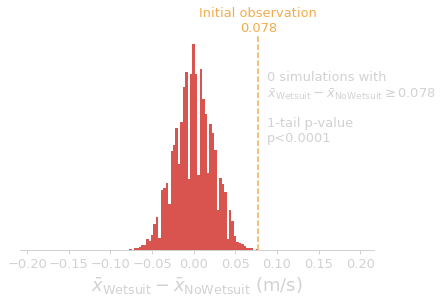

In [8]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.01, 0.15, 0.82, 0.75])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
    
for ax in [ax1]:
    ax.hist(res_diff_paired, bins="auto", color=colors["red"])
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel(r'$\bar{x}_{\mathrm{Wetsuit}}-\bar{x}_{\mathrm{No Wetsuit}}$ (m/s)', size=18, color=colors["lightgray"])
    ax.set_ylim(0)
    ax.set_xlim(lims) #from previous graph
    
for ax in [ax2]:
    ax.set_ylim(ax1.get_ylim())
    ax.axvline(np.diff(data[["NoWetsuit", "Wetsuit"]].mean()), color=colors["orange"], ls="--")
    ax.text(np.diff(data[["NoWetsuit", "Wetsuit"]].mean()), ax.get_ylim()[1]*1.01, "Initial observation\n" "{:.3f}".format(np.diff(data[["NoWetsuit", "Wetsuit"]].mean())[0]), color=colors["orange"], size=13, ha="center")
    ax.axis("off")
    
for ax in [ax3]:
    ax.set_ylim(ax1.get_ylim())
    n_above = np.sum(res_diff_paired>=np.diff(data[["NoWetsuit", "Wetsuit"]].mean()))
    ax.text(np.diff(data[["NoWetsuit", "Wetsuit"]].mean())+0.01, ax.get_ylim()[1]*0.7, "{:.0f} simulations with\n" r'$\bar{{x}}_{{\mathrm{{Wetsuit}}}}-\bar{{x}}_{{\mathrm{{No Wetsuit}}}}\geq$' "{:.3f}".format(n_above, np.diff(data[["NoWetsuit", "Wetsuit"]].mean())[0]), color=colors["lightgray"], size=13, ha="left")
    ax.text(np.diff(data[["NoWetsuit", "Wetsuit"]].mean())+0.01, ax.get_ylim()[1]*0.5, "1-tail p-value\np<0.0001", color=colors["lightgray"], size=13, ha="left")
    ax.axis("off")
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/wetsuit-resampling-paired.svg", transparent=True)

### non paired vs paired analysis

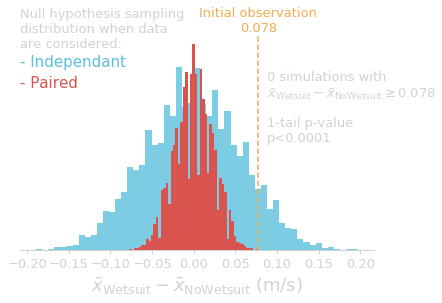

In [9]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.01, 0.15, 0.82, 0.75])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
    
for ax in [ax1]:
    ax.hist(res_diff, bins="auto", color=colors["blue"], alpha=0.8)
    ax.hist(res_diff_paired, bins="auto", color=colors["red"])
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel(r'$\bar{x}_{\mathrm{Wetsuit}}-\bar{x}_{\mathrm{No Wetsuit}}$ (m/s)', size=18, color=colors["lightgray"])
    ax.set_ylim(0)
    ax.text(ax.get_xlim()[0], ax.get_ylim()[1]*1.12, "Null hypothesis sampling\ndistribution when data\nare considered:", color=colors["lightgray"], size=13, ha="left", va="top")
    ax.text(ax.get_xlim()[0], ax.get_ylim()[1]*0.85, "- Independant", color=colors["blue"], size=15, ha="left")
    ax.text(ax.get_xlim()[0], ax.get_ylim()[1]*0.75, "- Paired", color=colors["red"], size=15, ha="left")
    ax.set_xlim(lims) #from previous graph
    
for ax in [ax2]:
    ax.set_ylim(ax1.get_ylim())
    ax.axvline(np.diff(data[["NoWetsuit", "Wetsuit"]].mean()), color=colors["orange"], ls="--")
    ax.text(np.diff(data[["NoWetsuit", "Wetsuit"]].mean()), ax.get_ylim()[1]*1.01, "Initial observation\n" "{:.3f}".format(np.diff(data[["NoWetsuit", "Wetsuit"]].mean())[0]), color=colors["orange"], size=13, ha="center")
    ax.axis("off")
    
for ax in [ax3]:
    ax.set_ylim(ax1.get_ylim())
    n_above = np.sum(res_diff_paired>=np.diff(data[["NoWetsuit", "Wetsuit"]].mean()))
    ax.text(np.diff(data[["NoWetsuit", "Wetsuit"]].mean())+0.01, ax.get_ylim()[1]*0.7, "{:.0f} simulations with\n" r'$\bar{{x}}_{{\mathrm{{Wetsuit}}}}-\bar{{x}}_{{\mathrm{{No Wetsuit}}}}\geq$' "{:.3f}".format(n_above, np.diff(data[["NoWetsuit", "Wetsuit"]].mean())[0]), color=colors["lightgray"], size=13, ha="left")
    ax.text(np.diff(data[["NoWetsuit", "Wetsuit"]].mean())+0.01, ax.get_ylim()[1]*0.5, "1-tail p-value\np<0.0001", color=colors["lightgray"], size=13, ha="left")
    ax.axis("off")
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/wetsuit-resampling-paired-vs-non-paired.svg", transparent=True)

## 95% confidence intervals

In [10]:
diffs = data.Wetsuit-data.NoWetsuit


n_simul = 10000
res_diff_ci = np.zeros(n_simul)

for i in range(n_simul):
    bootsample = np.random.choice(diffs, size=len(diffs))
    res_diff_ci[i] = np.mean(bootsample)

np.percentile(res_diff_ci, [2.5, 97.5])

array([ 0.06583333,  0.08916667])

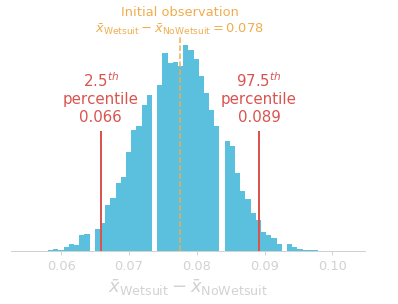

In [14]:
#Observed diff
observed_diff = np.mean(diffs)

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.1, 0.15, 0.82, 0.75])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
    
for ax in [ax1]:
    ax.hist(res_diff_ci, bins="auto", color=colors["blue"])
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel(r'$\bar{x}_{\mathrm{Wetsuit}}-\bar{x}_{\mathrm{No Wetsuit}}$', size=18, color=colors["lightgray"])
    #ax.set_xlim(-7, 7)
    ax.set_ylim(0)
    
for ax in [ax2]:
    ax.set_ylim(ax1.get_ylim())
    ax.axvline(observed_diff, color=colors["orange"], ls="--")
    ax.text(observed_diff, ax.get_ylim()[1]*1.01, "Initial observation\n" r"$\bar{x}_{\mathrm{Wetsuit}}-\bar{x}_{\mathrm{No Wetsuit}}=0.078$", color=colors["orange"], size=13, ha="center")
    ax.axis("off")

for ax in [ax3]:
    ax.axvline(np.percentile(res_diff_ci, 2.5), ymax=0.55, color=colors["red"], lw=2)
    ax.axvline(np.percentile(res_diff_ci, 97.5), ymax=0.55, color=colors["red"], lw=2)
    ax.text(np.percentile(res_diff_ci, 2.5), ax.get_ylim()[1]*0.6, "2.5$^{{th}}$\npercentile\n{:.3f}".format(np.percentile(res_diff_ci, 2.5)), color=colors["red"], size=15, ha="center")
    ax.text(np.percentile(res_diff_ci, 97.5), ax.get_ylim()[1]*0.6, "97.5$^{{th}}$\npercentile\n{:.3f}".format(np.percentile(res_diff_ci, 97.5)), color=colors["red"], size=15, ha="center")
    ax.axis("off")


plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/wetsuit-resampling-paired-ci95.svg", transparent=True)

In [23]:
np.diff(data[["Wetsuit", "NoWetsuit"]].mean())[0]

-0.077500000000000346

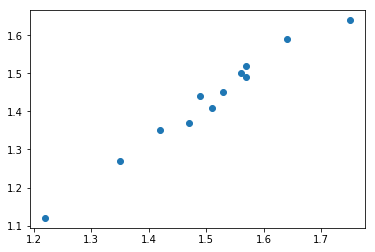

In [46]:
plt.plot(data.Wetsuit, data.NoWetsuit, "o")

In [47]:
data.describe()

,Wetsuit,NoWetsuit
count,12.000000,12.000000
mean,1.506667,1.429167
std,0.136271,0.141065
min,1.220000,1.120000
25%,1.457500,1.365000
50%,1.520000,1.445000
75%,1.570000,1.505000
max,1.750000,1.640000
